In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


file_path = 'backend-result-list.xlsx'
df = pd.read_excel('backend-result-list.xlsx', header=2)

In [2]:
score_cols_gpt = ['GPT Validity', 'GPT Correctness', 'GPT Maintainability']
score_cols_claude = ['Claude Validity', 'Claude Correctness', 'Claude Maintainability']
all_score_cols = score_cols_gpt + score_cols_claude

# Convert all score columns to numeric (force None/empty string to NaN)
for col in all_score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where any score column has NaN
df_scored = df.dropna(subset=all_score_cols, how='any').copy()

# Exclude initial project and table design task
print(f"Original number of rows: {len(df)}, Remaining after processing: {len(df_scored)}")

Original number of rows: 18, Remaining after processing: 16


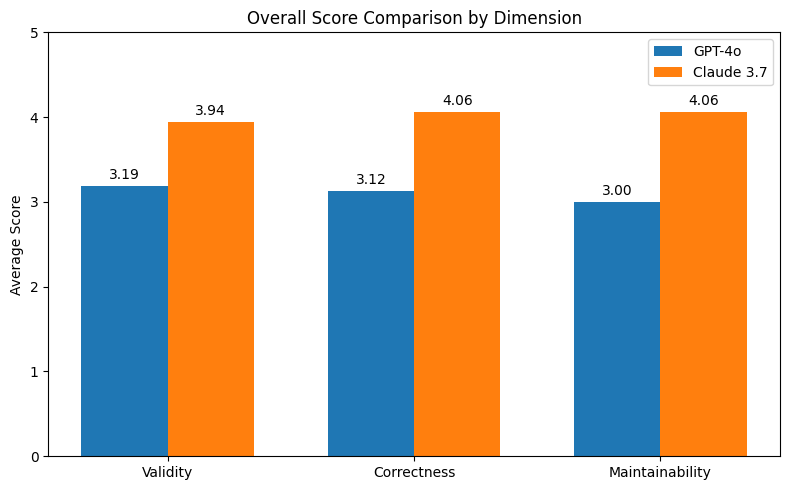

In [3]:
dimensions = ['Validity', 'Correctness', 'Maintainability']

# Calculate the average scores for GPT/Claude in each dimension
gpt_means = df_scored[score_cols_gpt].mean()
claude_means = df_scored[score_cols_claude].mean()

# Set X-axis ticks
x = np.arange(len(dimensions))  # 0, 1, 2
width = 0.35  # Width of each bar

# Create the chart
fig, ax = plt.subplots(figsize=(8, 5))

# Draw grouped bar chart for GPT-4o
rects1 = ax.bar(x - width/2, gpt_means, width, label='GPT-4o')

# Draw grouped bar chart for Claude 3.7
rects2 = ax.bar(x + width/2, claude_means, width, label='Claude 3.7')

# Set Y-axis label
ax.set_ylabel('Average Score')

# Set chart title
ax.set_title('Overall Score Comparison by Dimension')

# Set X-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(dimensions)

# Set Y-axis maximum value to 5 (highest score)
ax.set_ylim(0, 5)

# Display legend
ax.legend()

# Annotate score values on each bar
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',                      # Display up to two decimal places
                xy=(rect.get_x() + rect.get_width()/2, height),  # Annotate above the bar
                xytext=(0, 3),                        # Offset upward by 3 points
                textcoords="offset points",
                ha='center', va='bottom')

# Automatically adjust chart spacing
plt.tight_layout()

# Display the chart
plt.show()

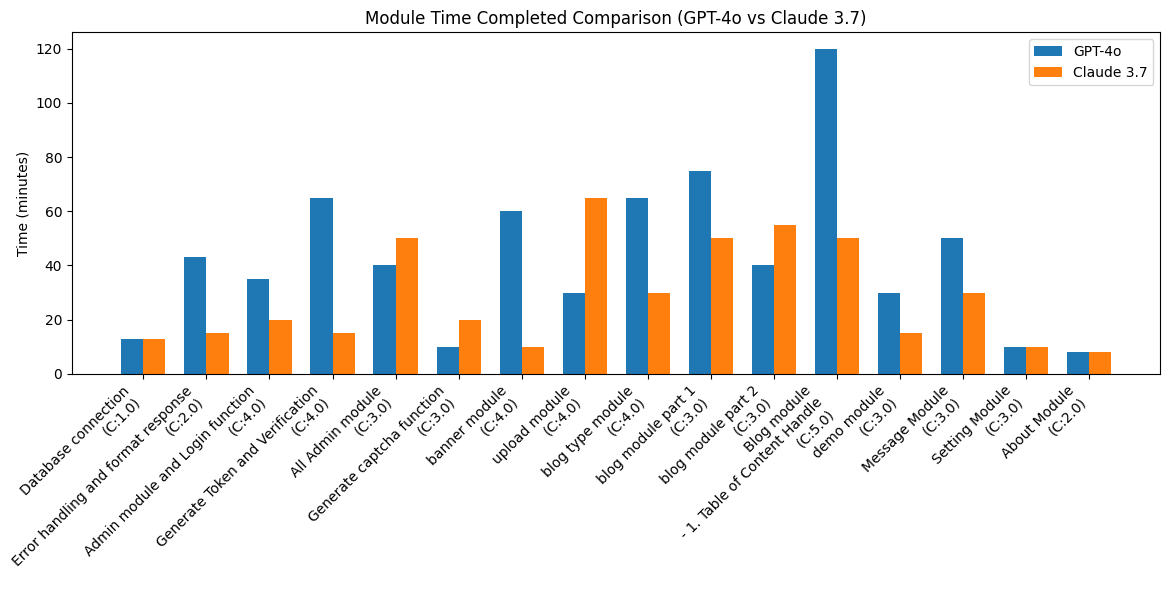

In [4]:
# Select only modules with valid scores (already filtered in df_scored)
modules = df_scored['Task Description']
gpt_time = df_scored['task total minutes (with AI GPT-4o)']
claude_time = df_scored['task total minutes  (with AI Claude 3.7)']
complexities = df_scored['Task and Prompt Complexity'].astype(str)
xticks_labels = [f"{m}\n(C:{c})" for m, c in zip(modules, complexities)]

# Set up bar chart parameters
fig, ax = plt.subplots(figsize=(12, 6))        # Set figure size
bar_width = 0.35                               # Set width of each bar
x = np.arange(len(modules))                    # X axis positions for each module

# Plot GPT-4o time bars, slightly left
rects1 = ax.bar(x - bar_width/2, gpt_time, bar_width, label='GPT-4o')

# Plot Claude 3.7 time bars, slightly right
rects2 = ax.bar(x + bar_width/2, claude_time, bar_width, label='Claude 3.7')

# Set y-axis label
ax.set_ylabel('Time (minutes)')

# Set chart title
ax.set_title('Module Time Completed Comparison (GPT-4o vs Claude 3.7)')

# Set x-axis ticks and labels (module names), rotate for readability
ax.set_xticks(x)
ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

# Show legend
ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

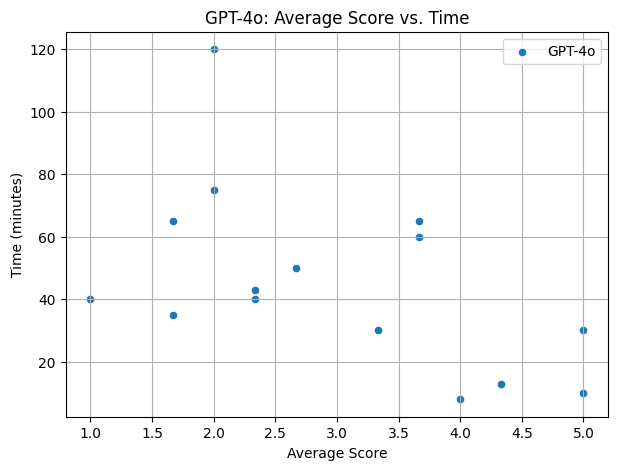

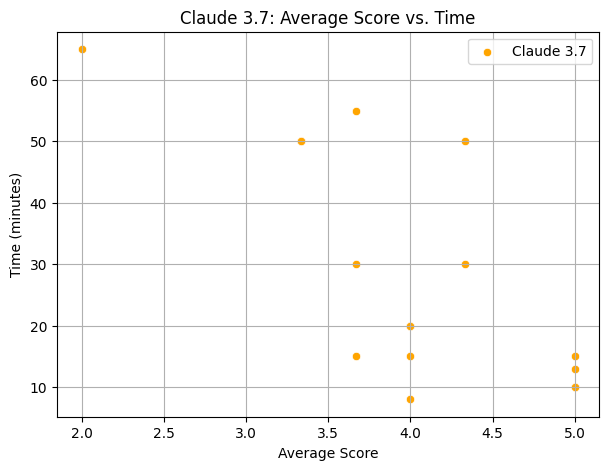

In [5]:
# Calculate average score
df_scored['GPT_avg_score'] = df_scored[score_cols_gpt].mean(axis=1)
df_scored['Claude_avg_score'] = df_scored[score_cols_claude].mean(axis=1)

# GPT-4o Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_scored, x='GPT_avg_score', y='task total minutes (with AI GPT-4o)', label='GPT-4o')
plt.title('GPT-4o: Average Score vs. Time')
plt.xlabel('Average Score')
plt.ylabel('Time (minutes)')
plt.grid(True)
plt.show()

# Claude 3.7 Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_scored, x='Claude_avg_score', y='task total minutes  (with AI Claude 3.7)', label='Claude 3.7', color='orange')
plt.title('Claude 3.7: Average Score vs. Time')
plt.xlabel('Average Score')
plt.ylabel('Time (minutes)')
plt.grid(True)
plt.show()

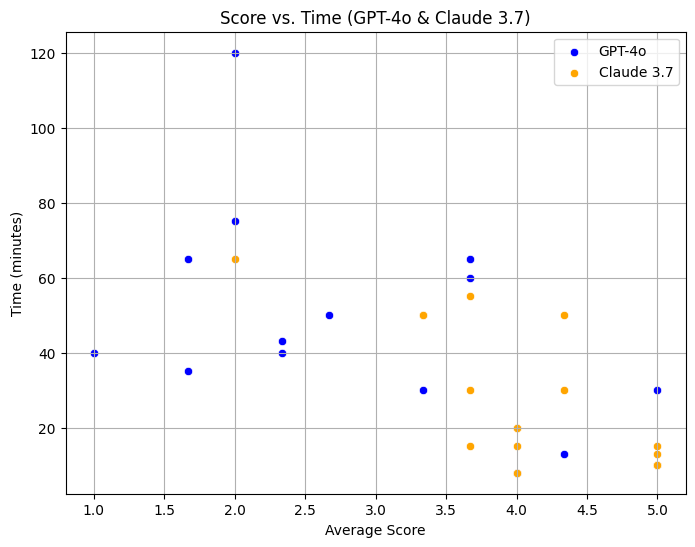

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_scored, x='GPT_avg_score', y='task total minutes (with AI GPT-4o)', label='GPT-4o', color='blue')
sns.scatterplot(data=df_scored, x='Claude_avg_score', y='task total minutes  (with AI Claude 3.7)', label='Claude 3.7', color='orange')
plt.title('Score vs. Time (GPT-4o & Claude 3.7)')
plt.xlabel('Average Score')
plt.ylabel('Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

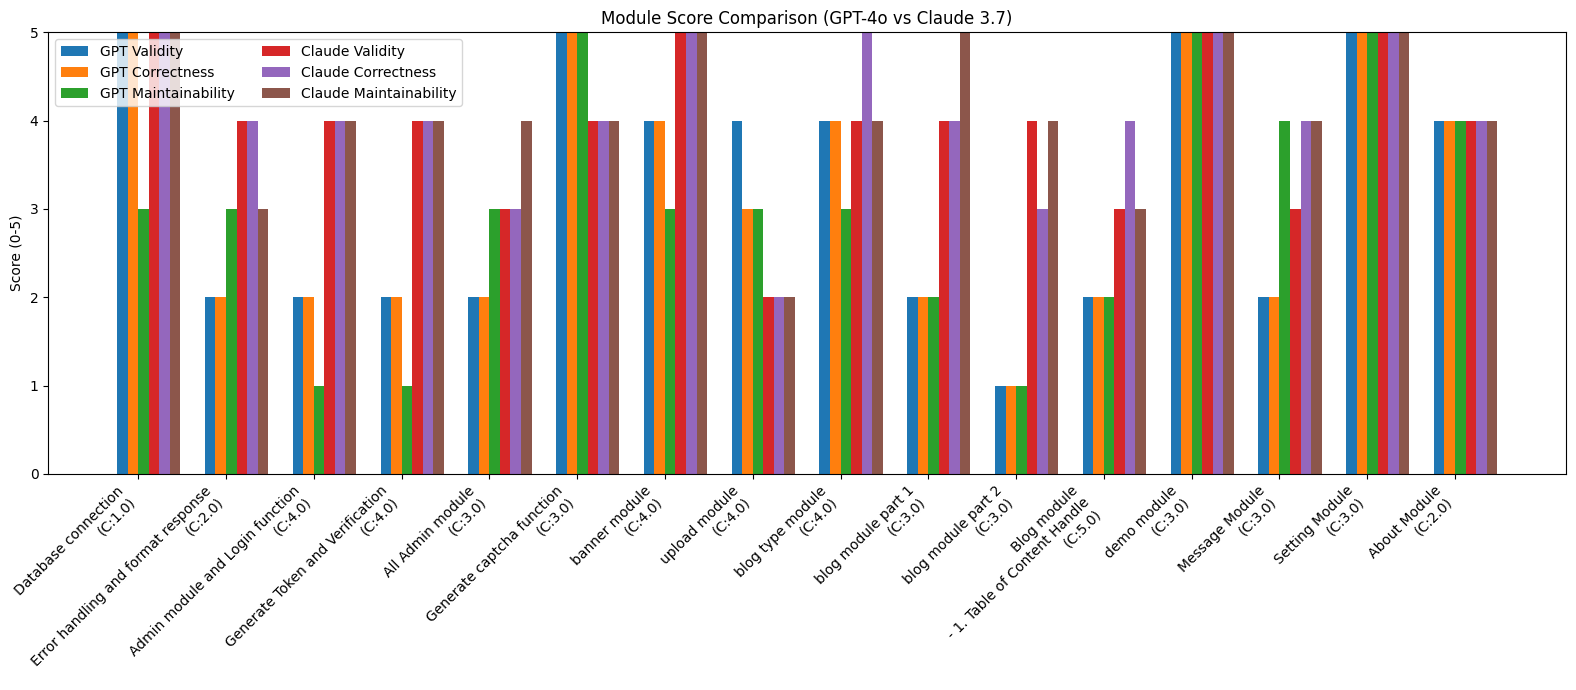

In [7]:
score_cols_gpt = ['GPT Validity', 'GPT Correctness', 'GPT Maintainability']
score_cols_claude = ['Claude Validity', 'Claude Correctness', 'Claude Maintainability']
complexities = df_scored['Task and Prompt Complexity'].astype(str)
dimensions = ['Validity', 'Correctness', 'Maintainability']
modules = df_scored['Task Description']
xticks_labels = [f"{m}\n(C:{c})" for m, c in zip(modules, complexities)]
x = np.arange(len(modules))
bar_width = 0.12

fig, ax = plt.subplots(figsize=(16, 7))

# draw GPT marks
for i, dim in enumerate(dimensions):
    ax.bar(x + i*bar_width - bar_width*1.5, df_scored[score_cols_gpt[i]], bar_width, label=f'GPT {dim}')

# draw Claude marks
for i, dim in enumerate(dimensions):
    ax.bar(x + (i+3)*bar_width - bar_width*1.5, df_scored[score_cols_claude[i]], bar_width, label=f'Claude {dim}')

ax.set_xticks(x)
ax.set_xticklabels(xticks_labels , rotation=45, ha='right')
ax.set_ylim(0, 5)
ax.set_ylabel('Score (0-5)')
ax.set_title('Module Score Comparison (GPT-4o vs Claude 3.7)')
ax.legend(ncol=2)
plt.tight_layout()
plt.show()

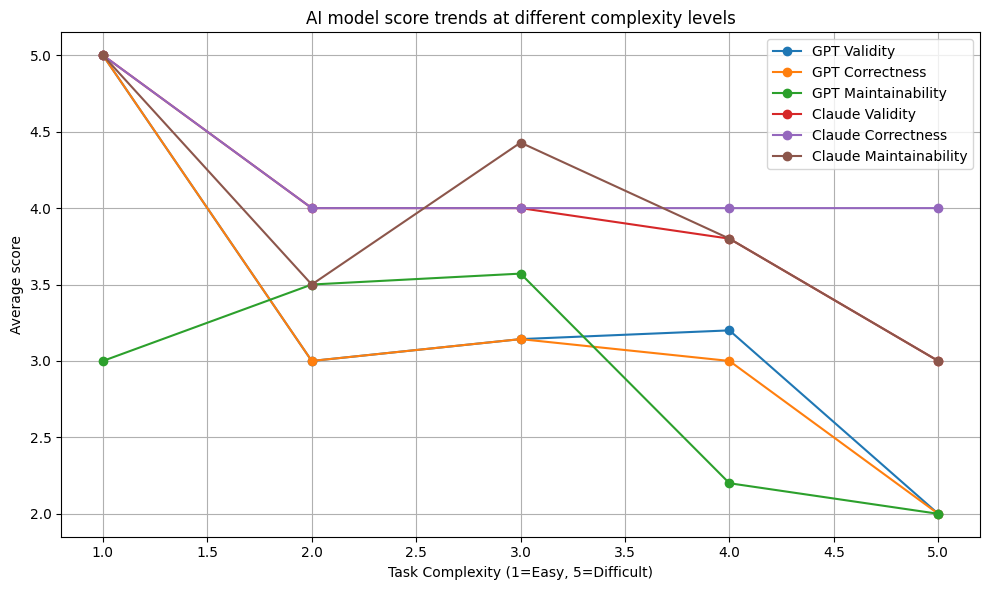

In [8]:

score_cols = [
    'GPT Validity', 'GPT Correctness', 'GPT Maintainability',
    'Claude Validity', 'Claude Correctness', 'Claude Maintainability'
]

# Calculate the average score by complexity group
grouped = df.groupby('Task and Prompt Complexity')[score_cols].mean().sort_index()

plt.figure(figsize=(10, 6))
for col in score_cols:
    plt.plot(grouped.index, grouped[col], marker='o', label=col)

plt.xlabel('Task Complexity (1=Easy, 5=Difficult)')
plt.ylabel('Average score')
plt.title('AI model score trends at different complexity levels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()